In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [3]:
df = pd.read_csv('../data/data.csv')

In [4]:
df

,Date,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H19,H20,H21,H22,H23,H24,Media_del_dia,Punta,Llano,Valle
0,2023-12-31,18.21,5.00,4.00,0.31,0.00,0.00,0.01,4.00,4.30,...,75.01,101.30,92.97,85.49,74.74,71.96,30.056250,47.94750,47.94750,47.94750
1,2023-12-30,86.31,82.33,78.77,70.00,62.06,59.01,76.02,79.39,86.31,...,84.00,81.50,80.00,75.00,56.85,43.23,68.405417,74.47750,74.47750,74.47750
2,2023-12-29,102.07,95.15,94.37,93.90,87.38,87.00,93.00,105.19,109.62,...,122.40,123.76,126.72,123.24,109.00,102.07,103.500417,111.59875,111.59875,111.59875
3,2023-12-28,95.62,87.99,78.56,76.20,75.18,76.46,90.78,101.11,108.37,...,117.98,121.50,128.46,122.02,112.12,100.15,98.193333,107.05500,107.05500,107.05500
4,2023-12-27,78.00,75.00,58.59,54.10,50.18,53.40,65.10,80.20,91.75,...,109.18,111.49,121.53,120.38,105.00,90.78,79.545000,89.94875,89.94875,89.94875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,1998-01-05,37.02,13.52,13.29,13.29,13.29,13.16,13.28,13.29,18.96,...,37.35,38.77,38.34,37.98,37.98,37.98,25.960833,32.14875,32.14875,32.14875
9492,1998-01-04,35.58,20.00,13.46,13.34,13.28,13.28,13.28,13.28,13.16,...,37.62,38.07,39.55,40.75,40.75,39.67,23.191250,24.65750,24.65750,24.65750
9493,1998-01-03,25.33,18.93,18.33,18.33,17.71,17.43,17.43,13.52,17.43,...,22.72,22.96,23.63,23.66,22.12,22.54,19.594167,20.53625,20.53625,20.53625
9494,1998-01-02,29.77,18.35,16.61,16.11,15.70,15.70,17.27,18.11,18.52,...,28.55,28.60,28.34,28.27,27.36,23.16,22.440000,25.00875,25.00875,25.00875


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9495 non-null   object 
 1   H1             9496 non-null   float64
 2   H2             9496 non-null   float64
 3   H3             9496 non-null   float64
 4   H4             9496 non-null   float64
 5   H5             9496 non-null   float64
 6   H6             9496 non-null   float64
 7   H7             9496 non-null   float64
 8   H8             9496 non-null   float64
 9   H9             9496 non-null   float64
 10  H10            9496 non-null   float64
 11  H11            9496 non-null   float64
 12  H12            9496 non-null   float64
 13  H13            9496 non-null   float64
 14  H14            9496 non-null   float64
 15  H15            9496 non-null   float64
 16  H16            9496 non-null   float64
 17  H17            9496 non-null   float64
 18  H18     

In [6]:
type(df['Date'])

pandas.core.series.Series

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Mes'] = df['Date'].dt.month

In [9]:
df['Dia_mes'] = df['Date'].dt.day
df['Dia_semana'] = df['Date'].dt.dayofweek

In [10]:
df['Semana'] = df['Date'].dt.weekday

In [11]:
df['Año'] = df['Date'].dt.year

In [12]:
'''
Primavera = 1
Verano = 2
Otoño = 3
Invierno = 4

'''

'\nPrimavera = 1\nVerano = 2\nOtoño = 3\nInvierno = 4\n\n'

In [13]:
def get_season(date):
    if date.month in [3, 4, 5]:
        return '1'
    elif date.month in [6, 7, 8]:
        return '2'
    elif date.month in [9, 10, 11]:
        return '3'
    else:
        return '4'

df['Estacion'] = df['Date'].apply(get_season)

In [14]:
df['Precio_Maximo'] = df.loc[:, 'H1':'H24'].max(axis=1)
df['Precio_Minimo'] = df.loc[:, 'H1':'H24'].min(axis=1)
df['STD_diaria'] = df.loc[:, 'H1':'H24'].std(axis=1)

In [15]:
df['Media_Precio_Maximo_mes'] = df.groupby(['Año', 'Mes'])['Precio_Maximo'].transform('mean')
df['Media_Precio_Minimo_mes'] = df.groupby(['Año', 'Mes'])['Precio_Minimo'].transform('mean')
df['Media_STD_diaria_mes'] = df.groupby(['Año', 'Mes'])['STD_diaria'].transform('mean')

In [16]:
df['Fin_de_semana'] = 0

In [17]:
for index, row in df.iterrows():
    if row['Dia_semana'] >= 5:
        df.at[index, 'Fin_de_semana'] = 1
    else:
        df.at[index, 'Fin_de_semana'] = 0

In [18]:
df

,Date,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,Semana,Año,Estacion,Precio_Maximo,Precio_Minimo,STD_diaria,Media_Precio_Maximo_mes,Media_Precio_Minimo_mes,Media_STD_diaria_mes,Fin_de_semana
0,2023-12-31,18.21,5.00,4.00,0.31,0.00,0.00,0.01,4.00,4.30,...,6.0,2023.0,4,101.30,0.00,34.817724,105.400000,47.593871,17.839671,1
1,2023-12-30,86.31,82.33,78.77,70.00,62.06,59.01,76.02,79.39,86.31,...,5.0,2023.0,4,88.21,42.04,15.102659,105.400000,47.593871,17.839671,1
2,2023-12-29,102.07,95.15,94.37,93.90,87.38,87.00,93.00,105.19,109.62,...,4.0,2023.0,4,126.72,87.00,11.380940,105.400000,47.593871,17.839671,0
3,2023-12-28,95.62,87.99,78.56,76.20,75.18,76.46,90.78,101.11,108.37,...,3.0,2023.0,4,128.46,75.18,15.580826,105.400000,47.593871,17.839671,0
4,2023-12-27,78.00,75.00,58.59,54.10,50.18,53.40,65.10,80.20,91.75,...,2.0,2023.0,4,121.53,50.18,21.143356,105.400000,47.593871,17.839671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,1998-01-05,37.02,13.52,13.29,13.29,13.29,13.16,13.28,13.29,18.96,...,0.0,1998.0,4,38.77,13.16,10.268291,35.887097,17.280645,6.290465,0
9492,1998-01-04,35.58,20.00,13.46,13.34,13.28,13.28,13.28,13.28,13.16,...,6.0,1998.0,4,40.75,12.84,10.984821,35.887097,17.280645,6.290465,1
9493,1998-01-03,25.33,18.93,18.33,18.33,17.71,17.43,17.43,13.52,17.43,...,5.0,1998.0,4,25.33,13.52,2.713175,35.887097,17.280645,6.290465,1
9494,1998-01-02,29.77,18.35,16.61,16.11,15.70,15.70,17.27,18.11,18.52,...,4.0,1998.0,4,29.77,15.70,4.636666,35.887097,17.280645,6.290465,0


In [19]:
df_heatmap = df.iloc[:, 25:]

In [20]:
df_heatmap

,Media_del_dia,Punta,Llano,Valle,Mes,Dia_mes,Dia_semana,Semana,Año,Estacion,Precio_Maximo,Precio_Minimo,STD_diaria,Media_Precio_Maximo_mes,Media_Precio_Minimo_mes,Media_STD_diaria_mes,Fin_de_semana
0,30.056250,47.94750,47.94750,47.94750,12.0,31.0,6.0,6.0,2023.0,4,101.30,0.00,34.817724,105.400000,47.593871,17.839671,1
1,68.405417,74.47750,74.47750,74.47750,12.0,30.0,5.0,5.0,2023.0,4,88.21,42.04,15.102659,105.400000,47.593871,17.839671,1
2,103.500417,111.59875,111.59875,111.59875,12.0,29.0,4.0,4.0,2023.0,4,126.72,87.00,11.380940,105.400000,47.593871,17.839671,0
3,98.193333,107.05500,107.05500,107.05500,12.0,28.0,3.0,3.0,2023.0,4,128.46,75.18,15.580826,105.400000,47.593871,17.839671,0
4,79.545000,89.94875,89.94875,89.94875,12.0,27.0,2.0,2.0,2023.0,4,121.53,50.18,21.143356,105.400000,47.593871,17.839671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,25.960833,32.14875,32.14875,32.14875,1.0,5.0,0.0,0.0,1998.0,4,38.77,13.16,10.268291,35.887097,17.280645,6.290465,0
9492,23.191250,24.65750,24.65750,24.65750,1.0,4.0,6.0,6.0,1998.0,4,40.75,12.84,10.984821,35.887097,17.280645,6.290465,1
9493,19.594167,20.53625,20.53625,20.53625,1.0,3.0,5.0,5.0,1998.0,4,25.33,13.52,2.713175,35.887097,17.280645,6.290465,1
9494,22.440000,25.00875,25.00875,25.00875,1.0,2.0,4.0,4.0,1998.0,4,29.77,15.70,4.636666,35.887097,17.280645,6.290465,0


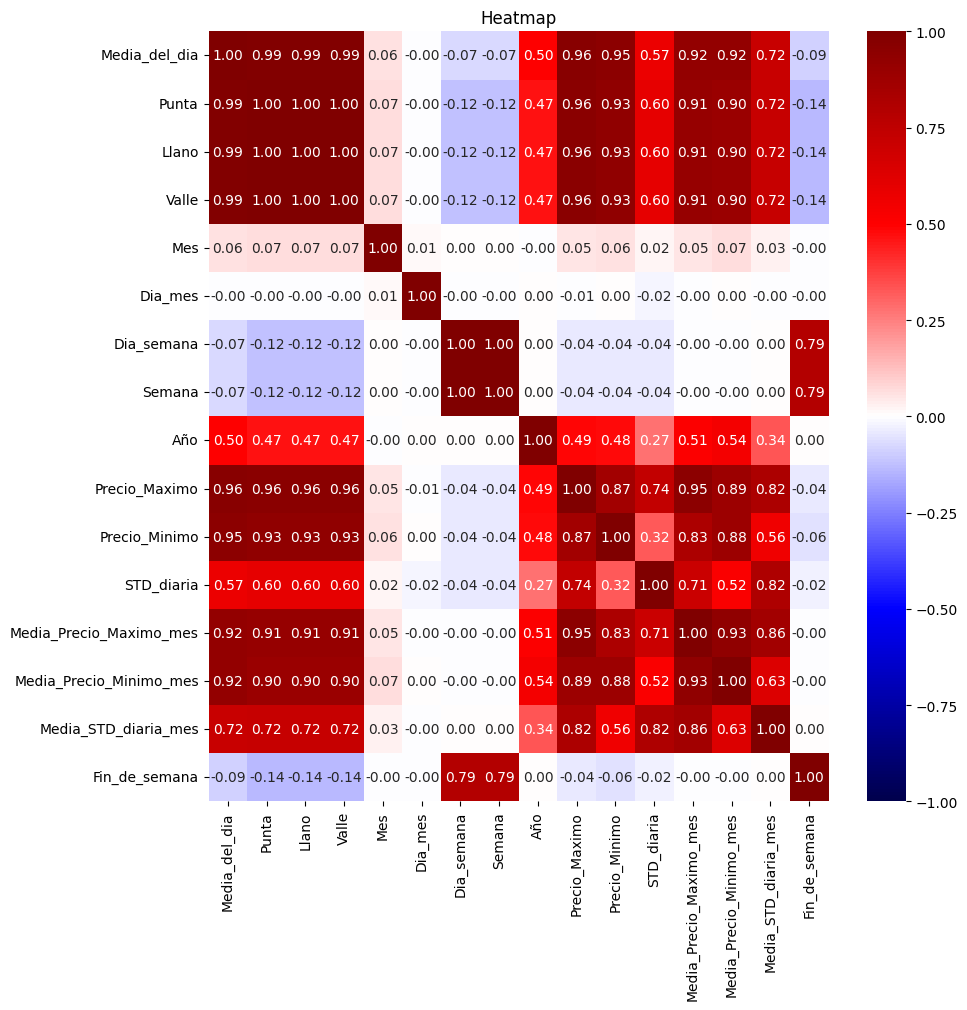

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df_heatmap.corr(numeric_only=True),vmin= -1, vmax=1 ,annot=True, cmap='seismic', fmt=".2f")
plt.title('Heatmap');

In [22]:
df.to_csv('data2.csv')